<a href="https://colab.research.google.com/github/nevermind78/Capstone/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#!wget https://github.com/nevermind78/Capstone/blob/main/sepsis.csv
!wget https://github.com/nevermind78/Capstone/raw/main/finalized_model.sav

--2021-12-09 09:14:11--  https://github.com/nevermind78/Capstone/raw/main/finalized_model.sav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nevermind78/Capstone/main/finalized_model.sav [following]
--2021-12-09 09:14:11--  https://raw.githubusercontent.com/nevermind78/Capstone/main/finalized_model.sav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24109 (24K) [application/octet-stream]
Saving to: ‘finalized_model.sav’

finalized_model.sav 100%[===================>]  23.54K  --.-KB/s    in 0.001s  

2021-12-09 09:14:11 (32.0 MB/s) - ‘finalized_model.sav’ saved [24109/24109]



# Code for MLP Classifier Algorithm

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [95]:
dataset = pd.read_csv("https://raw.githubusercontent.com/nevermind78/Capstone/main/sepsis.csv")
dataset.shape

(38809, 41)

In [66]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [67]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37945,    # to match majority class
                                 random_state=123) # reproducible results

In [68]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [69]:
df_upsampled.SepsisLabel.value_counts()

1    37945
0    37945
Name: SepsisLabel, dtype: int64

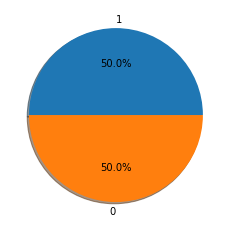

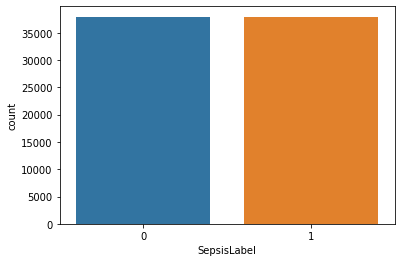

In [70]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [71]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [72]:
Y = df_upsampled[df_upsampled.columns[40:]].values
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [73]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


In [74]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


In [75]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


In [76]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


In [79]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier

In [ ]:
clf=MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=13000,
    learning_rate_init=1e-5,
    tol=1e-4,)

In [ ]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=13000, random_state=1,
              solver='lbfgs')

In [80]:
import gzip, pickle


In [81]:
# save the model to disk
filename = 'finalized_model.sav'
#pickle.dump(clf, open(filename, 'wb'))

In [86]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9529582290156806


In [4]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay


In [ ]:
predicted = loaded_model.predict(X_test)
print(predicted.shape)
print(Y_test.shape)
print(confusion_matrix(Y_test,predicted))

(15178,)
(15178,)
[[6955  602]
 [ 112 7509]]


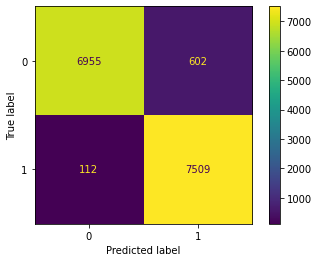

In [ ]:
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [9]:
!wget https://raw.githubusercontent.com/nevermind78/Capstone/main/test_D.csv

--2021-12-09 08:54:47--  https://raw.githubusercontent.com/nevermind78/Capstone/main/test_D.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4777460 (4.6M) [text/plain]
Saving to: ‘test_D.csv’

test_D.csv          100%[===================>]   4.56M  --.-KB/s    in 0.08s   

2021-12-09 08:54:47 (59.5 MB/s) - ‘test_D.csv’ saved [4777460/4777460]



In [87]:
df_test =pd.read_csv('test_D.csv')
df_test.shape

(25210, 42)

In [88]:
X2_test = df_test[df_test.columns[0:40]].values


In [89]:

Y2_test = df_test[df_test.columns[41:]].values
Y2_test
labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)
Y2_test

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [90]:
print("sepsis dimensions without label : {}".format(X2_test.shape))

sepsis dimensions without label : (25210, 40)


In [91]:
print("sepsis dimensions without label : {}".format(Y2_test.shape))

sepsis dimensions without label : (25210,)


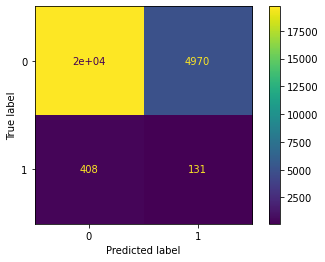

In [93]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
predicted = loaded_model.predict(X2_test)
cm=confusion_matrix(Y2_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_model.classes_)
disp.plot()
plt.show()

In [94]:
result = loaded_model.score(X2_test, Y2_test)
print(result)

0.7866719555731853
